Student Details

Name:Michel Danjou

ID:18263461

Etivity 4

All necessary imports are provided. Please do not add further imports.

In [1]:
#%reset
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

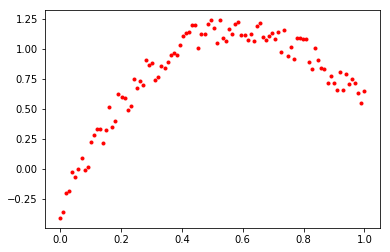

In [3]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [4]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [5]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [6]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [7]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [8]:
ein=[]
eout=[]
weights=[]

lambdas = np.linspace(0,1,1000)
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Task 4.1 
  * Using the above code, find the optimum regularization parameter, l. 
    * In order to do so, you will need to decide on a suitable list of l values. 
    * Pick at most 1000 values! 
    * Once you have found the optimal l, compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

#### Rubric
  * Beginning: Partial implementation without valid results.
  * Developing: Partial implementation with partial results.
  * Accomplished: Correct results including plots. The chosen lambdas may not cover the range [0,1] appropriately and plots may not show very clear examples of over/underfitting.
  * Exemplary: Correct results, suitable range of <=1000 lambdas, plots clearly showing under+overfitting.

Text(0.5,1,'Ein and Eout for lambda > 0')

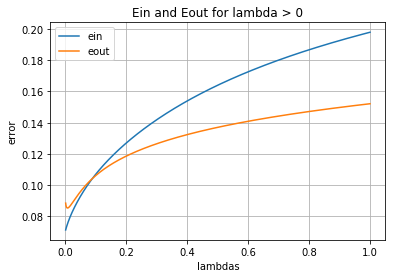

In [9]:
# plot ein, eout for lambda > 0
plt.plot(lambdas[1:],ein[1:], label='ein')
plt.plot(lambdas[1:],eout[1:], label='eout')

plt.xlabel("lambdas")
plt.ylabel("error")
plt.legend(loc='best')
plt.grid(True)
plt.title("Ein and Eout for lambda > 0")


The graph is showing that the lowest Ein and Eout are obtained with the **lowest lambda**.
Interestingly the Eout and Ein curves sometimes cross resulting in Eout being lower than Ein when lambda tends towards 1

In [10]:
lowest_eout_index = np.argmin(eout)
best_lambda = lambdas[lowest_eout_index]

print("lowest_eout_index          :", lowest_eout_index)
print("Best lambda used           :", best_lambda)
print("Eout without regularization:", eout[0])
print("Eout with regularization   :", eout[lowest_eout_index])
print("Difference                 :", eout[0] - eout[lowest_eout_index])

lowest_eout_index          : 7
Best lambda used           : 0.007007007007007007
Eout without regularization: 0.6617545225235437
Eout with regularization   : 0.08530378531905758
Difference                 : 0.5764507372044861


# Task 4.2 Provide the following plots:

  * A plot showing the estimate of Eout vs l on the domain [0,1]
  * A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. 
  
In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

#### Rubric
See task 4.1 above

Text(0.5,1,'Eout by lambda (where lambda> 0)')

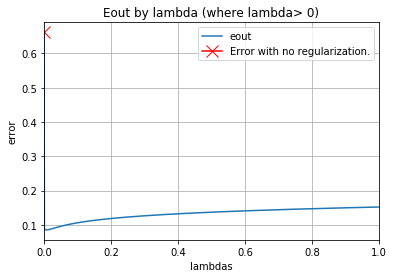

In [11]:
plt.plot(lambdas, eout, label='eout')
plt.plot(lambdas[0], eout[0], marker='x', color='red',  markersize=12, label="Error with no regularization.")
plt.xlim(0,1)
plt.xlabel("lambdas")
plt.ylabel("error")
plt.legend(loc='best')
plt.grid(True)

plt.title("Eout by lambda (where lambda> 0)")


#### Observations
We can see that Eout is very high when lambda is 0, which is expected as it means there is no regularisation. The value of Eout(lambda=0) is represented with a <span style="color:red">red cross </span> on the above graph which can be seen on the top left part of the plot.

We can see an important improvement of Eout as soon as lamdba starts to grow over 0. 
Eout then slowly increases as lambda grows.


In [12]:
def calc_polynom(weights, X):
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 

C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


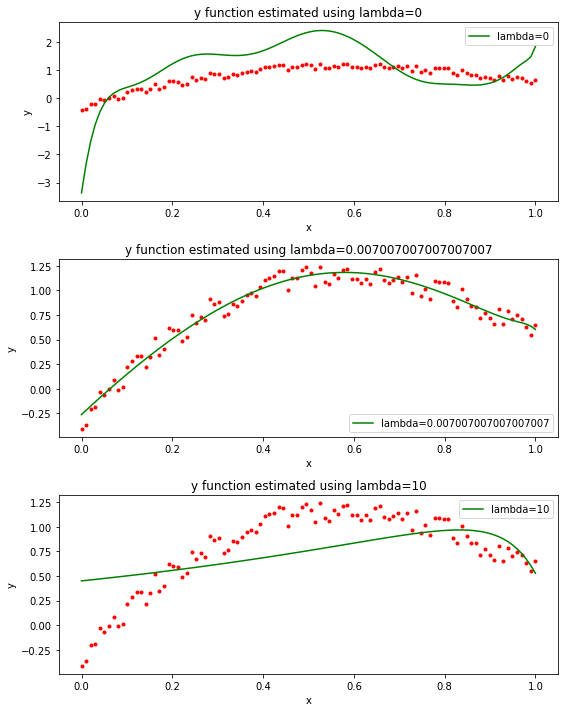

In [13]:
lambdas = np.linspace(0,1,1000)

def experiment(order, l):

    # random_state fixed to get reproducible (and 'good'! :-)) results
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)

    weights = weights_reg(X_train,y_train,l)
    ein = calc_error(weights, X_train,y_train)
    eout = calc_error(weights, X_test,y_test)
    
    return ein, eout, weights

plt.figure(figsize=(8, 10)) 
    
ls = [0, best_lambda, 10]
for i in range(1,4):
    subplt = int(str(31)+str(i))
    
    plt.subplot(subplt)
    ein, eout, weights = experiment(50, ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = 'lambda=' + str(ls[i-1])
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()



In [20]:
print("best lambda: ", best_lambda)

best lambda:  0.003003003003003003


### Observations
The best lambda is 0.003003003003003003

We can see that:
  * for lambda =0, we have no regularization and hence the polynomial is oscillating around the target function. The target approximation is poor.
  * for the optimum lambda, the polynomial estimates the target function very accurately
  * for a very high lambda, the polynomial is more or less flat and poorly approximates the target function.


# Task 5
  * Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. 
  * Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. 
  * Note that the data set provided is ordered by increasing X.
  
#### Rubric
  * Beginning: Partial implementation without valid results.
  * Developing: Partial implementation with partial results.
  * Accomplished: Full implementation of 10-fold CV yielding valid lambda and Eout.
  * Exemplary: Full implementation of 10-fold CV yielding valid lamda, Eout and plots of over/under/optimal fitting.  

#### Implementation inspired by a review Chelliah Kanthanathan's code and "Learning from Data" by Prof. Yaser S. Abu-Mostafa, p149. 

#### Algorithm implemented:

Iterate over a wide range of lambda values.
For each lambda:
  * perform K-Fold cross validation.
  * Calculate Eout.
  * Keep the average Eout
  
Once all the lambdas are processed:
  * Find the lowest Eout and its corresponding lambda. This is the best lambda.
  * Calculate K-Fold once more to find the weights associated with the best lambda.
  
Plot the curve using the weight associated with the best lambda.  

In [14]:

lambdas = np.linspace(0,1,1000)

def get_eval(order, l):
    ein=[]
    eout=[]
    weights=[]
    
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        weights.append(w)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
    
    Eval = np.mean(eout)
    print("Lambda:{} Eval: {}".format(l, Eval))
    return Eval


def experiment(order, l):
    ein=[]
    eout=[]
    weights=[]
    
    kf = KFold(n_splits=10, shuffle=True, random_state=5)
    kf.get_n_splits(X)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X_trans[train_index], X_trans[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        weights.append(w)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
    
    # Validation. Find the lowest Eout and best lambda
    lowest_eout_index = np.argmin(eout)
    best_lambda = lambdas[lowest_eout_index]

    return ein[lowest_eout_index], eout[lowest_eout_index], weights[lowest_eout_index]
    


all_eval = []

for l in lambdas:
    my_eval = get_eval(50, l)
    all_eval.append(my_eval)

# Validation. Find the Eval and best lambda
lowest_eout_index = np.argmin(all_eval)
best_lambda = lambdas[lowest_eout_index]
print("\nlowest_eout_index:{} best_lambda:{}".format(lowest_eout_index, best_lambda))




Lambda:0.0 Eval: 4.06881979151171
Lambda:0.001001001001001001 Eval: 0.08391759233198856
Lambda:0.002002002002002002 Eval: 0.0833451071939319
Lambda:0.003003003003003003 Eval: 0.08314801811289337
Lambda:0.004004004004004004 Eval: 0.08318852189024085
Lambda:0.005005005005005005 Eval: 0.0833819506447109
Lambda:0.006006006006006006 Eval: 0.08367522653957316
Lambda:0.007007007007007007 Eval: 0.08403435914866272
Lambda:0.008008008008008008 Eval: 0.08443713762953338
Lambda:0.009009009009009009 Eval: 0.084868771559778
Lambda:0.01001001001001001 Eval: 0.08531923870634966
Lambda:0.011011011011011011 Eval: 0.08578163908855226
Lambda:0.012012012012012012 Eval: 0.086251153704149
Lambda:0.013013013013013013 Eval: 0.08672437363339199
Lambda:0.014014014014014014 Eval: 0.08719886029102102
Lambda:0.015015015015015015 Eval: 0.08767285252199716
Lambda:0.016016016016016016 Eval: 0.08814506855922433
Lambda:0.017017017017017015 Eval: 0.08861457022935652
Lambda:0.018018018018018018 Eval: 0.08908066860742622
L

Lambda:0.16216216216216217 Eval: 0.12549600154304685
Lambda:0.16316316316316315 Eval: 0.12565328539075066
Lambda:0.16416416416416416 Eval: 0.12581005648253066
Lambda:0.16516516516516516 Eval: 0.12596632102105937
Lambda:0.16616616616616617 Eval: 0.12612208508501843
Lambda:0.16716716716716717 Eval: 0.12627735463178652
Lambda:0.16816816816816815 Eval: 0.1264321355000594
Lambda:0.16916916916916916 Eval: 0.1265864334124231
Lambda:0.17017017017017017 Eval: 0.12674025397786212
Lambda:0.17117117117117117 Eval: 0.12689360269419586
Lambda:0.17217217217217218 Eval: 0.1270464849504887
Lambda:0.17317317317317318 Eval: 0.12719890602938147
Lambda:0.17417417417417416 Eval: 0.12735087110937932
Lambda:0.17517517517517517 Eval: 0.12750238526708596
Lambda:0.17617617617617617 Eval: 0.12765345347939022
Lambda:0.17717717717717718 Eval: 0.1278040806255902
Lambda:0.1781781781781782 Eval: 0.12795427148950136
Lambda:0.17917917917917917 Eval: 0.12810403076147436
Lambda:0.18018018018018017 Eval: 0.1282533630403981

Lambda:0.3363363363363363 Eval: 0.1479422441312231
Lambda:0.33733733733733734 Eval: 0.14805097554491947
Lambda:0.3383383383383383 Eval: 0.14815952447329
Lambda:0.33933933933933935 Eval: 0.14826789138794913
Lambda:0.34034034034034033 Eval: 0.1483760767573537
Lambda:0.34134134134134136 Eval: 0.14848408104686775
Lambda:0.34234234234234234 Eval: 0.14859190471882308
Lambda:0.3433433433433433 Eval: 0.14869954823257905
Lambda:0.34434434434434436 Eval: 0.14880701204458155
Lambda:0.34534534534534533 Eval: 0.14891429660842379
Lambda:0.34634634634634637 Eval: 0.14902140237489836
Lambda:0.34734734734734735 Eval: 0.14912832979205592
Lambda:0.3483483483483483 Eval: 0.14923507930525626
Lambda:0.34934934934934936 Eval: 0.14934165135722405
Lambda:0.35035035035035034 Eval: 0.14944804638809678
Lambda:0.35135135135135137 Eval: 0.14955426483547737
Lambda:0.35235235235235235 Eval: 0.14966030713448494
Lambda:0.3533533533533533 Eval: 0.149766173717798
Lambda:0.35435435435435436 Eval: 0.14987186501570487
Lambd

Lambda:0.5055055055055055 Eval: 0.16403727467329673
Lambda:0.5065065065065065 Eval: 0.16412049307381982
Lambda:0.5075075075075075 Eval: 0.16420358756535774
Lambda:0.5085085085085085 Eval: 0.16428655842683654
Lambda:0.5095095095095095 Eval: 0.16436940593660523
Lambda:0.5105105105105106 Eval: 0.1644521303724376
Lambda:0.5115115115115115 Eval: 0.1645347320115313
Lambda:0.5125125125125125 Eval: 0.16461721113051161
Lambda:0.5135135135135135 Eval: 0.16469956800542768
Lambda:0.5145145145145145 Eval: 0.16478180291175648
Lambda:0.5155155155155156 Eval: 0.1648639161244019
Lambda:0.5165165165165165 Eval: 0.1649459079176952
Lambda:0.5175175175175175 Eval: 0.16502777856539586
Lambda:0.5185185185185185 Eval: 0.16510952834069265
Lambda:0.5195195195195195 Eval: 0.16519115751620256
Lambda:0.5205205205205206 Eval: 0.16527266636397261
Lambda:0.5215215215215215 Eval: 0.16535405515548057
Lambda:0.5225225225225225 Eval: 0.16543532416163312
Lambda:0.5235235235235235 Eval: 0.16551647365276984
Lambda:0.5245245

Lambda:0.6766766766766766 Eval: 0.17667569171500025
Lambda:0.6776776776776777 Eval: 0.17674131964538803
Lambda:0.6786786786786787 Eval: 0.17680686336879536
Lambda:0.6796796796796797 Eval: 0.17687232307286932
Lambda:0.6806806806806807 Eval: 0.17693769894478364
Lambda:0.6816816816816816 Eval: 0.17700299117123577
Lambda:0.6826826826826827 Eval: 0.17706819993845108
Lambda:0.6836836836836837 Eval: 0.17713332543218152
Lambda:0.6846846846846847 Eval: 0.1771983678377081
Lambda:0.6856856856856857 Eval: 0.17726332733984052
Lambda:0.6866866866866866 Eval: 0.17732820412291908
Lambda:0.6876876876876877 Eval: 0.17739299837081535
Lambda:0.6886886886886887 Eval: 0.17745771026693163
Lambda:0.6896896896896897 Eval: 0.17752233999420525
Lambda:0.6906906906906907 Eval: 0.1775868877351055
Lambda:0.6916916916916916 Eval: 0.177651353671637
Lambda:0.6926926926926927 Eval: 0.1777157379853406
Lambda:0.6936936936936937 Eval: 0.177780040857293
Lambda:0.6946946946946947 Eval: 0.17784426246810905
Lambda:0.6956956956

Lambda:0.8608608608608609 Eval: 0.18750477262150306
Lambda:0.8618618618618619 Eval: 0.1875576236132405
Lambda:0.8628628628628628 Eval: 0.1876104178833668
Lambda:0.8638638638638638 Eval: 0.18766315554788257
Lambda:0.8648648648648649 Eval: 0.1877158367224837
Lambda:0.8658658658658659 Eval: 0.18776846152256205
Lambda:0.8668668668668669 Eval: 0.18782103006320391
Lambda:0.8678678678678678 Eval: 0.1878735424591949
Lambda:0.8688688688688688 Eval: 0.1879259988250179
Lambda:0.8698698698698699 Eval: 0.1879783992748552
Lambda:0.8708708708708709 Eval: 0.18803074392258914
Lambda:0.8718718718718719 Eval: 0.18808303288180256
Lambda:0.8728728728728729 Eval: 0.18813526626577926
Lambda:0.8738738738738738 Eval: 0.18818744418750583
Lambda:0.8748748748748749 Eval: 0.18823956675967174
Lambda:0.8758758758758759 Eval: 0.18829163409467078
Lambda:0.8768768768768769 Eval: 0.18834364630460157
Lambda:0.8778778778778779 Eval: 0.18839560350126736
Lambda:0.8788788788788788 Eval: 0.1884475057961791
Lambda:0.8798798798

In [19]:
print("\nlowest_eout_index:{} best_lambda:{}".format(lowest_eout_index, best_lambda))


lowest_eout_index:3 best_lambda:0.003003003003003003


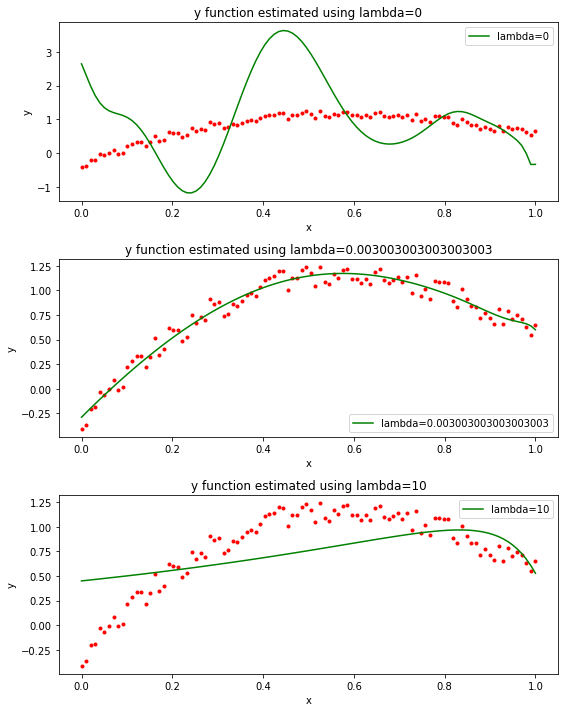

In [15]:

plt.figure(figsize=(8, 10)) 
    
ls = [0, best_lambda, 10]

for i in range(1,4):
    subplt = int(str(31)+str(i))
    
    plt.subplot(subplt)
    ein, eout, weights = experiment(50, ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = 'lambda=' + str(ls[i-1])
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()


### Observations
The best lambda is 0.003003003003003003

We can see that:
  * for lambda =0, we have no regularization and hence the polynomial is oscillating around the target function. The target approximation is poor.
  * for the optimum lambda, the polynomial estimates the target function trend very accurately
  * for a very high lambda, the polynomial is more or less flat and poorly approximates the target function.


### Possible algorithm improvement 
Please note that we should **hold back** a portion of the data set and use it to only **evaluate the final model**, which would provide an **unbiased evaluation of Eout**.  

So in terms of algorithm we should consider doing this: 

  * Split the data set between training set  and testing set (80/20 rule) 
  * Run the KFold on the training set to find the best lambda 
  * Once we have the best lambda and associated weights, we calculate Eout on the testing set that we had saved at step 1. 

More information regarding holding out a portion of the data set for evaluating the final model: https://machinelearningmastery.com/difference-test-validation-datasets/

# Task 6 (CE6002)
  * Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).

  * Observe the resulting Eout, and l compare these to previous results. 
    * What do you see? 
    * Is this what you expected?
  * Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

#### Rubric
  * Beginning: Incorrect use of LassoCV and Ridge CV.
  * Developing: Incorrect use of LassCV or RidgeCV.
  * Accomplished: LassoCV and RidgeCV used correctly. Valid commentary on difference in lambda obtained in Task 1,2.
  * Exemplary: Correct use of Lasso&RidgeCV. Valid commentary on lambda including insights in the differences with Task 1,2 relating to the ability to approximate Eout correctly.

Reference: 
  * https://scikit-learn.org/stable/auto_examples/cluster/plot_feature_agglomeration_vs_univariate_selection.html#sphx-glr-auto-examples-cluster-plot-feature-agglomeration-vs-univariate-selection-py
  * https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
  * https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b 
    * Describes how RidgeVC and LassoCV perform better at reducting over-fitting compared to simple Linear regression. 

What is the difference between Ridge and RidgeCV?
  * https://stats.stackexchange.com/questions/262640/the-results-of-cv-on-ridge-are-different-than-the-results-of-ridgecv

In [16]:
def alternate_regression(title, clf):
    score = clf.score(X_trans, y) 
    pred = clf.predict(X_trans)
    params = clf.get_params
    lambdas = clf.alpha_ 
    coeffs = clf.coef_

    plt.plot(X,y,'r.')
    plt.xlabel('x')
    plt.ylabel('y')
    lbl = title
    plt.title('y function estimated using ' + lbl)
    plt.plot(X, pred  , 'g', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    print("score  :", score)
    print("params :", params)
    print("pred   :", pred)
    print("lambdas:", lambdas)
    print("coefs  :", coeffs)

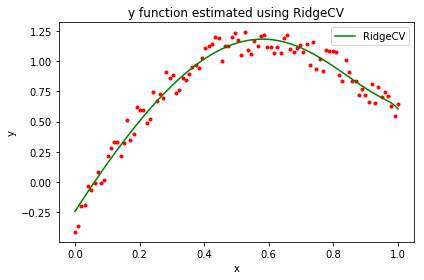

score  : 0.9617831727329745
params : <bound method BaseEstimator.get_params of RidgeCV(alphas=[0.003003003003003003, 0.001, 0.01, 0.1, 1], cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)>
pred   : [-0.2429628  -0.20124094 -0.15987335 -0.11887075 -0.0782441  -0.03800454
  0.00183656  0.0412676   0.08027678  0.11885208  0.15698125  0.19465182
  0.23185111  0.26856622  0.30478402  0.34049118  0.37567413  0.41031911
  0.44441215  0.47793906  0.51088546  0.54323677  0.57497822  0.60609487
  0.63657158  0.66639307  0.6955439   0.72400848  0.75177109  0.77881592
  0.80512704  0.83068845  0.85548408  0.87949784  0.90271361  0.92511531
  0.94668689  0.96741238  0.98727592  1.0062618   1.0243545   1.04153877
  1.05779959  1.07312234  1.08749276  1.10089706  1.11332199  1.12475487
  1.13518374  1.14459735  1.15298534  1.16033827  1.16664773  1.17190647
  1.17610851  1.17924923  1.18132552  1.1823359   1.18228065  1.18116196
  1.17898408  1

In [17]:
clf = RidgeCV(alphas=[best_lambda, 1e-3, 1e-2, 1e-1, 1]).fit(X_trans, y)
alternate_regression("RidgeCV", clf)

C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\danjou\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


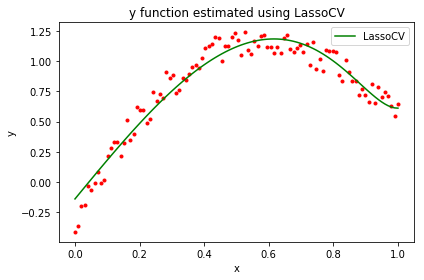

score  : 0.945314325204683
params : <bound method BaseEstimator.get_params of LassoCV(alphas=[0.003003003003003003, 0.001, 0.01, 0.1, 1], copy_X=True,
    cv=10, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=1, normalize=False, positive=False, precompute='auto',
    random_state=0, selection='cyclic', tol=0.0001, verbose=False)>
pred   : [-0.13912709 -0.1063503  -0.07360392 -0.04090519 -0.00827136  0.02428033
  0.05673262  0.08906827  0.12127004  0.15332067  0.18520293  0.21689955
  0.2483933   0.27966692  0.31070317  0.34148481  0.37199458  0.40221524
  0.43212954  0.46172024  0.49097008  0.51986182  0.54837822  0.57650202
  0.60421597  0.63150284  0.65834537  0.68472632  0.71062844  0.73603448
  0.7609272   0.78528935  0.80910368  0.83235295  0.85501991  0.87708732
  0.89853794  0.91935452  0.93951983  0.95901663  0.97782769  0.99593579
  1.01332369  1.0299742   1.04587011  1.06099424  1.07532942  1.08885852
  1.10156441  1.11343004  1.12443836  1.13457241  1

In [18]:
#clf = LassoCV(cv=10, random_state=0).fit(X_trans, y)
clf = LassoCV(alphas=[best_lambda, 1e-3, 1e-2, 1e-1, 1], cv=10, random_state=0).fit(X_trans, y)


alternate_regression("LassoCV", clf)

Reference: https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

Lasso and Ridge are 2 different regularisers:

##### Ridge:
Ridge performs L2 regularization which adds a penalty equivalent to square of the magnitude of coefficients. L2 regularization has the effect of shrinking the weights which helps to reduce the model complexity. This can be clearly seen by the output of the coef_ parameters.

Ridge selected the following optimum lambda: **0.004004004004004004**, which matches the lambda found by our own implementation at task 5 which was also 0.004004004004004004

##### Lasso:
Performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.
Lasso pushes a large number of weights to zero which results in simpler models. This can be clearly seen by the output of the coef_ parameters.

Lasso found the following optimum lambda: 0.001

#### TODO: Talk about Ridge & Lasso compared to linear regression
